In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [20]:
raw_data = pd.read_csv("SAT_GPA_Attendance.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


## Predicting GPA based on SAT using Linear Regression

Import the data from csv file

In [21]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [22]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [23]:
# dependent variable
y = data['GPA']
# independent variable
x1 = data[['SAT', 'Attendance']]

based on the coding above, y is gpa which means the dependent variable and x1 is the SAT and Attendance which shows the independent variable

In [24]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           2.19e-15
Time:                        01:36:16   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The least squares method or Ordinary Least Square (OLS) is a
the simplest regression coefficient estimation method. If between variables
free of perfect multicollinearity (correlation coefficient between independent variables
equal to 1), then the OLS method cannot be used

based on the output above we know that the Coefficient GPA is 0.6439, SAT 0.0014 and Attendance 0.2226

## visualize the regression lines in the scatterplot

in the dataset there are two types of students, the two types are: those with attendance and without attendance, because we can visualize two regression lines, the formula is

with attendace: (Coef GPA + Coef Attendance) + Coef SAT * x_sat

without attendace: Coef GPA + Coef SAT * x_sat

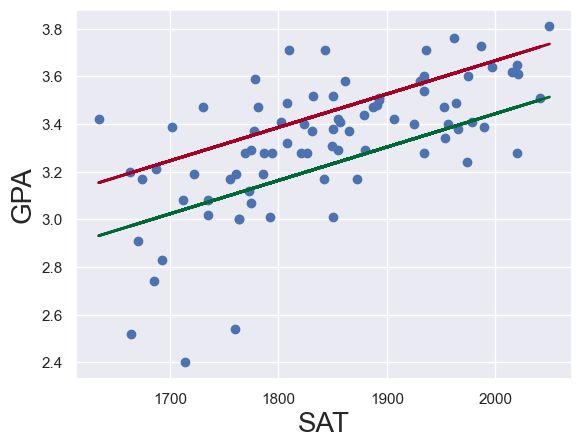

In [25]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Recoloring the data points

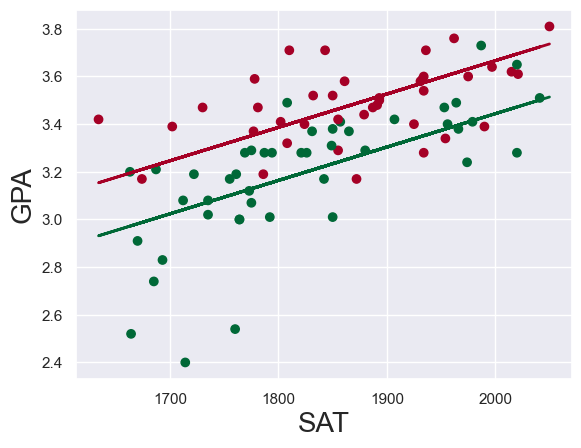

In [26]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')


yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']


fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## predict the SAT based on the regression that has been made above

In [32]:
prediction_data = pd.DataFrame({'const':1, 'SAT': [480,480,960,960,1520,1520,1880,1880], 'Attendance':[0,1,0,1,0,1,0,1]})
prediction_data = prediction_data[['const', 'SAT', 'Attendance']]
prediction_data

,const,SAT,Attendance
0,1,480,0
1,1,480,1
2,1,960,0
3,1,960,1
4,1,1520,0
5,1,1520,1
6,1,1880,0
7,1,1880,1


I created a new table that contains sat and attendance, with the same sat but there are two types: those that have attendees and those without attendees

In [33]:
predictions = results.predict(prediction_data)
predictions

0    1.315755
1    1.538399
2    1.987660
3    2.210304
4    2.771549
5    2.994193
6    3.275477
7    3.498121
dtype: float64

In [34]:
predictionsdf = pd.DataFrame({'Predictions':predictions})

prediction_data = prediction_data.join(predictionsdf)
prediction_data

,const,SAT,Attendance,Predictions
0,1,480,0,1.315755
1,1,480,1,1.538399
2,1,960,0,1.987660
3,1,960,1,2.210304
4,1,1520,0,2.771549
5,1,1520,1,2.994193
6,1,1880,0,3.275477
7,1,1880,1,3.498121


so we can conclude based on the output above that, the predicted gpa with attendance has a slightly higher GPA compared to those without attendance